In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
w_init = 0.5
n = 2
m = n
iters = m + 1
alpha = 0.5

A = np.zeros((m, n))
for i in range(m):
    A[i, i] = 1


In [33]:
def ReLU(x):
    return np.maximum(x, 0)

def dReLU(x):
    return ReLU(np.sign(x))

def grad(w, x):
    wx = w.dot(x)
    if wx < 0:
        return np.zeros_like(w)

    x_hat = w * ReLU(wx)
    wx_hat = w.dot(x_hat)
    return (x_hat - x) * wx + x * (wx_hat - wx)

In [34]:
# w = w_init * np.random.randn(n) / np.sqrt(n)
w = w_init * np.ones(n) / np.sqrt(n)

w_history = np.zeros((iters + 1, n))
w_history[0] = w

for iter in range(1, iters + 1):
    # i = np.random.choice(m)
    i = (iter - 1) % m
    x = A[i]
    g = grad(w, x)
    print(g)
    w += -alpha * g
    w_history[iter] = w

[-0.57452426  0.04419417]
[ 0.0704021  -0.45397213]
[-0.5781222   0.20481929]


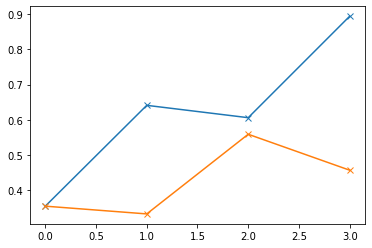

In [28]:
for i in range(m):
    plt.plot(np.arange(iters + 1), w_history[:, i], 'x-')
plt.show()

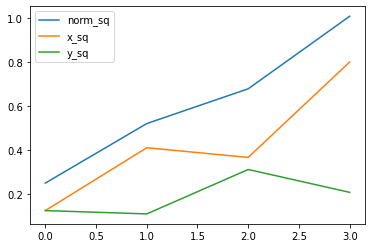

1.0084102313673886


In [29]:
w_sq = np.square(w_history)
norm_sq = np.sum(w_sq, axis=1)
plt.plot(np.arange(iters + 1), norm_sq, label="norm_sq")
plt.plot(np.arange(iters + 1), w_sq[:, 0], label="x_sq")
plt.plot(np.arange(iters + 1), w_sq[:, 1], label="y_sq")
plt.legend()
plt.show()
print(np.max(norm_sq))

In [50]:
def update(x, y, alpha=0.5):
    x_new = x * (1 + alpha * (2 - 2 * x * x - y * y))
    y_new = y * (1 - alpha * x * x)
    return x_new, y_new

def V(x, y):
    return 1 - x + y

def dV(x, y, alpha=0.5):
    return -alpha * x * (2 - 2 * x * x - y * y + x * y)

V_vals = []

x = w_history[0, 0]
y = w_history[0, 1]
V_vals.append(V(x, y))
print(dV(x, y))

x, y = update(x, y)
V_vals.append(V(x, y))
print(-dV(y, x))

y, x = update(y, x)
V_vals.append(V(x, y))

print(V_vals)
print(np.diff(np.array(V_vals)))


-0.3093592167691145
0.26218711521656957
[1.0, 0.6906407832308854, 0.9528278984474551]
[-0.30935922  0.26218712]


In [35]:
alpha = 0.5
x = 0.6408155204503087
y = 0.3314563036811941
print(x * (1 - alpha * y * y))

0.6056144725740099


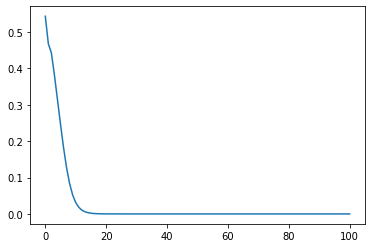

[-7.54953928e-02 -2.51938845e-02 -6.08207871e-02 -6.72856001e-02
 -6.79261339e-02 -6.42356417e-02 -5.54437440e-02 -4.35546245e-02
 -3.11767233e-02 -2.06522192e-02 -1.28863473e-02 -7.72484410e-03
 -4.50975163e-03 -2.59296980e-03 -1.47636229e-03 -8.36530853e-04
 -4.72307187e-04 -2.66336933e-04 -1.49966769e-04 -8.44375473e-05
 -4.75033088e-05 -2.67333167e-05 -1.50356472e-05 -8.46026568e-06
 -4.75790500e-06 -2.67704786e-06 -1.50548522e-06 -8.47050353e-07
 -4.76351416e-07 -2.68012557e-07 -1.50722255e-07 -8.47998625e-08
 -4.76906725e-08 -2.68300685e-08 -1.50907878e-08 -8.48804809e-09
 -4.77597558e-09 -2.68451662e-09 -1.51230403e-09 -8.48242821e-10
 -4.79657898e-10 -2.67234296e-10 -1.52922200e-10 -8.33995649e-11
 -4.95409814e-11 -2.52331066e-11 -1.68305172e-11 -6.82887574e-12
 -6.48072156e-12 -1.00566227e-12 -3.20598127e-12  8.36838643e-13
 -2.16983276e-12  1.41981722e-12 -1.84198862e-12  1.60427504e-12
 -1.73825649e-12  1.66263839e-12 -1.70543475e-12  1.68110470e-12
 -1.69504949e-12  1.68694

In [52]:
V = np.square(1 - w_history[:, 0]) + np.square(w_history[:, 1])
V_even = np.array([V[i] for i in range(iters + 1) if i % 2 == 0])
plt.plot(np.arange(len(V_even)), V_even)
plt.show()

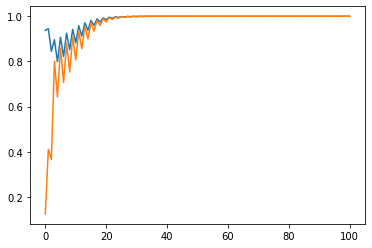

In [7]:
plt.plot(np.arange(iters + 1), 1 - (norm - np.square(w_history[:, 0]))/2)
plt.plot(np.arange(iters + 1), np.square(w_history[:, 0]))
plt.show()

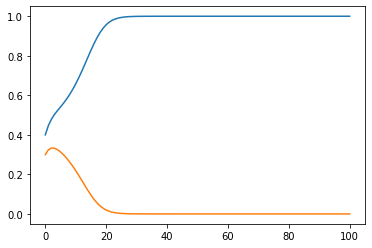

In [11]:
iters = 100
alpha = .6
x = 0.4
y = 0.3
x_vals = np.zeros(iters + 1)
y_vals = np.zeros(iters + 1)
x_vals[0] = x
y_vals[0] = y
for iter in range(1, iters + 1):
    x_new = (1 + alpha * (1 - x)) * (1 - alpha * y) * x
    y_new = (1 + alpha * (1 - y)) * (1 - alpha * x) * y
    x = x_new
    y = y_new
    # if iter % 2 == 0:
    #     x *= 1 - alpha * y
    #     y *= 1 + alpha * (1 - y)
    # else:
    #     y *= 1 - alpha * x
    #     x *= 1 + alpha * (1 - x)
    x_vals[iter] = x
    y_vals[iter] = y
plt.plot(np.arange(iters + 1), x_vals)
plt.plot(np.arange(iters + 1), y_vals)
plt.show()

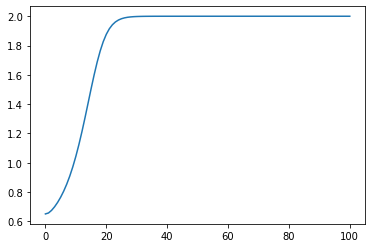

In [12]:
plt.plot(np.arange(iters + 1), np.square(x_vals) + np.square(1 - y_vals))

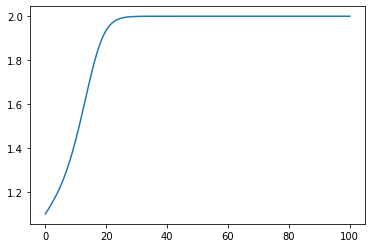

In [13]:
plt.plot(np.arange(iters + 1), x_vals + 1 - y_vals)